# **ASSIGNMENT- 01**

## EXCERCISE 1

In [1]:
import torch
import torchvision  #To be able to access standard datasets more easily
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np  # To plot and display stuff
import torch.optim as optim # Where the optimization modules are
import urllib.request
from random import randint
from mlxtend.data import loadlocal_mnist
import platform
from sklearn.metrics import accuracy_score

In [2]:
# Using torchvision we can conveniently load some datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# Extract tensor of data and labels for both the training and the test set
x, y = trainset.data.float(), trainset.targets
x_test, y_test = testset.data.float(), testset.targets

### Q1
* Try to load the same data directly from the "MINST database" website http://yann.lecun.com/exdb/mnist/

* Be careful that the images can have a different normalization and encoding

In [4]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=381b9eb91025630cfd01c3afd1b6b73e81480b08f2299d98a4ecc55ab9cdca9d
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [5]:
import gzip
import shutil
import wget


trainset_images = wget.download("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz", "train-images-idx3-ubyte.gz")

trainset_labels = wget.download("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz", "train-labels-idx1-ubyte.gz")

testset_images = wget.download("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz", "t10k-images-idx3-ubyte.gz")

testset_labels = wget.download("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz", "t10k-labels-idx1-ubyte.gz")

filenames = ["train-images-idx3-ubyte", "train-labels-idx1-ubyte", "t10k-images-idx3-ubyte", "t10k-labels-idx1-ubyte"]

for f in filenames:
    with gzip.open(f+'.gz', 'rb') as f_in:
        with open(f, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

x_train_download, y_train_download = loadlocal_mnist(
            images_path='train-images-idx3-ubyte',
            labels_path='train-labels-idx1-ubyte')

x_test_download, y_test_download = loadlocal_mnist(
            images_path='t10k-images-idx3-ubyte',
            labels_path='t10k-labels-idx1-ubyte')

In [6]:
print(x_train_download.shape, y_train_download.shape)
print(x.shape, y.shape)
print(x_test_download.shape, y_test_download.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
torch.Size([60000, 28, 28]) torch.Size([60000])
(10000, 784) (10000,)
torch.Size([10000, 28, 28]) torch.Size([10000])


The difference between the downloaded data and the one loaded from torch vision is that the last two dimensions are flattened in the downloaded data, which is acually the correct shape of the data that we need to feed to the model.

Code to flatten the last two dimensions:
```[Python]
torch.flatten(x, start_dim=1, end_dim=2)
```

In [7]:
# Transform labels to one_hot encoding
y_one_hot = torch.nn.functional.one_hot(y.to(torch.int64), num_classes=10).float()
y_test_one_hot = torch.nn.functional.one_hot(y_test.to(torch.int64), num_classes=10).float()

### Q2

Using the utilities in plt and numpy display some images and check that the corresponding labels are consistent

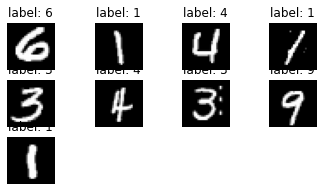

In [8]:
max_image_index = trainset.data.shape[0] - 1
n_images_to_show = 9
for i in range(0, n_images_to_show):
    image_idx = randint(0, max_image_index) # pick a random image from our dataset
    image, label = trainset[image_idx]
    plt.subplot(int(n_images_to_show/2),int(n_images_to_show/2), i+1)
    plt.imshow(image.numpy()[0], cmap='gray')
    plt.axis("off")
    plt.title("label: " + str(label))
plt.show()

### Q3
- **Complete the code below so to have a MLP with one hidden layer with 300 neurons**

- **Remember that we want one-hot outputs**

In [9]:
# Now let us define the neural network we are using
image_size = trainset.data.shape[1] * trainset.data.shape[2]
net = torch.nn.Sequential(
    torch.nn.Linear(image_size, 300),
    torch.nn.Sigmoid(),
    torch.nn.Linear(300, 10),
)

In [11]:
# GPU
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# For Accuracy
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean() * 100

### Q4

- **Complete the code below to perform a GD based optimization**

In [12]:
# CPU TO GPU

x = x.to(dev)
y = y.to(dev)
x_test = x_test.to(dev)
y_test = y_test.to(dev)
net = net.to(dev)

for k in range(100):
    optimizer.zero_grad()

    inputs = torch.flatten(x, start_dim=1, end_dim=2).to(dev)
    outputs = net(inputs)
    labels = y_one_hot.to(dev)

    #Define the empirical risk
    Risk = loss(outputs, labels)

    #Make the backward step (1 line instruction)
    Risk.backward()

    #Upadte the parameters (1 line instruction)
    optimizer.step()

    with torch.no_grad():
        print("k=", k, "   Risk = ", Risk.item())

k= 0    Risk =  2.426805019378662
k= 1    Risk =  2.059744119644165
k= 2    Risk =  1.8141142129898071
k= 3    Risk =  1.6330887079238892
k= 4    Risk =  1.4865326881408691
k= 5    Risk =  1.3666075468063354
k= 6    Risk =  1.2655328512191772
k= 7    Risk =  1.179999589920044
k= 8    Risk =  1.1057738065719604
k= 9    Risk =  1.040987253189087
k= 10    Risk =  0.984626054763794
k= 11    Risk =  0.9357080459594727
k= 12    Risk =  0.8923757076263428
k= 13    Risk =  0.8543803095817566
k= 14    Risk =  0.8201102018356323
k= 15    Risk =  0.7890397310256958
k= 16    Risk =  0.7604593634605408
k= 17    Risk =  0.7347379326820374
k= 18    Risk =  0.7110958099365234
k= 19    Risk =  0.6894578337669373
k= 20    Risk =  0.6695007681846619
k= 21    Risk =  0.650956392288208
k= 22    Risk =  0.6339602470397949
k= 23    Risk =  0.6178784966468811
k= 24    Risk =  0.6031579375267029
k= 25    Risk =  0.589174211025238
k= 26    Risk =  0.5763946175575256
k= 27    Risk =  0.5640968680381775
k= 28    

### Q5

**Compute the final accuracy on test set**

In [13]:
predict_test = net(torch.flatten(x_test, start_dim=1, end_dim=2))
acc = accuracy(predict_test, y_test).cpu()
print(f"Final Accuracy on test: {acc} %")

Final Accuracy on test: 91.97000122070312 %


# Exercise 2

### Q1.
**On line 49 of the code it is commented that we want to perform a GD based optimization. However on line 45 we invoked optim.SGD as the optimizer. Explain why in this case we are still performing a gradient descent on the whole dataset even if it seems that we are invoking a stochastic method.**

Yes, we are indeed performing Gradient Descent (GD) because in Q4, we invoke the SGD optimizer but we pass the entire training dataset to our optimizer (no batches are involved here).

### Q2. 
**Discuss over-fitting issues by monitoring the train and test error curves.**

From the Validation curve shown below it can be inferred that both training and testing errors are very high for low value of Epochs and rapidly increase with further Epochs. That is model went from under-fitting to over-fitting. 

Both test and train errors keeps on decreasing even for very high values of Epochs and test error converges quicker than train error.  This shows that our model exhibits little-overfitting but not very severe over-fitting.
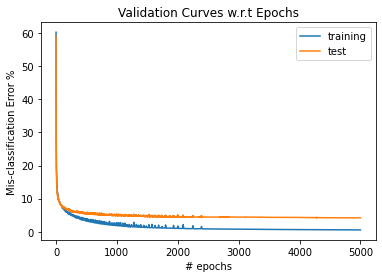

###Q3. 

**Discuss what role does the choice of the network (i.e. number of layers and number of neurons per layer) have on the bias-variance trade-off. First describe your expectations based on theoretical analysis (arguing on the different capacity of the models) then test this expectations with a small experimental campaign. Is the expected behavior confirmed by experimental results? Briefly discuss your findings.**

#### **Theoretical Analysis**


The bias and variance tradeoff: 

* under-fitting => high training and testing risk
* over-fitting => test risk is very high while the training risk is very low.

**Aim:**  Find the sweet spot between under-fitting and over-fitting by varying the capacity (complexity) of the model.

As already seen in the lecture, in theory:

* **Classical regime:** Very high bias and small variance (under-fitting) for a low capacity model and a small bias and large variance (over-fitting) when the model capacity is very high. But it is possible to find the sweet spot by finding an optimal capacity.

* **Modern interpolating regime:** the model behaves similarly as in the classical regime, but after a certain high capacity (deep networks) it seems that it is possible to have a model with perfect fitting on the training data and test data at the same time, thereby achieving better model generalization.

**Refer:**

![Image](https://miro.medium.com/max/1400/1*xPeh_NHGHbTmURrGWBNHKw.png)

*source https://arxiv.org/pdf/1812.11118.pdf*

## **Experimental Analysis:**
The following Bias-Variance Trade-off are obtained after the analysis where model capacity is increased by:
*  the no. of neurons (for a single hidden layer): This is found to be part of modern interpolating regime since both risks continue to decrease.
* Fixing the no. of neurons per layer to 300 and increasing the no. of layers: This is found to be part of classical regime, since there is over-fitting.
* Based upon the the two previous graphs, the final analysis is done and it found to be that a Neural Network with Architecture of 600 neurons per hidden layer, with 2 hidden layers performs better among the other compared models (Even the 300 neurons perform good but higher neurons are usually preferred from the first graph). 
(Note: This combination of Layers and Neurons is not unique, but this is what I chose). This Architecture is also belongs to Modern interpolating regime.

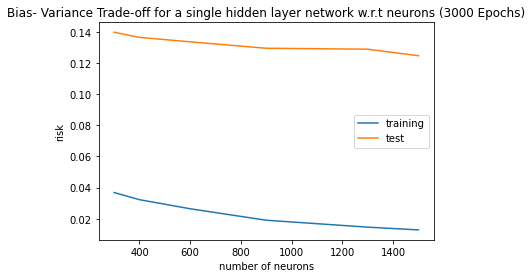
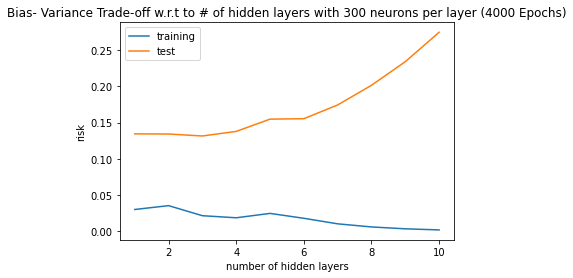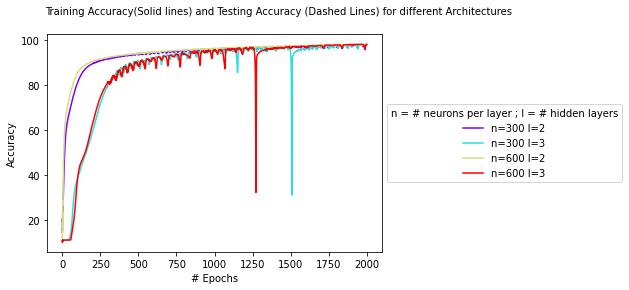

###Q4. 
**Discuss the benefits of using a cross entropy loss with respect to a quadratic loss.**

This is can be explained by an anology to Binary classsification problem. 
The below figure taken from the book, "Elements of Statistical Learning, Second Edition" shows various Loss functions in case of Binary classification problems. Here, $yf$ is positive in case of a correct classification and negative in case of wrong classification. 

As you can see that Cross-Entropy(Binomial Deviance) is a monotonously decreasing function, and it penalizes misclassified data more heavily than correctly classified data.  

Quadratic loss (Squared Error) is not monotonically decreasing and starts to increase after $yf>1$, thereby penalizing the correctly classified points. This turns into a non-convex optimization problem, which is undesirable.

Hence it is beneficial to use Cross-Entropy.
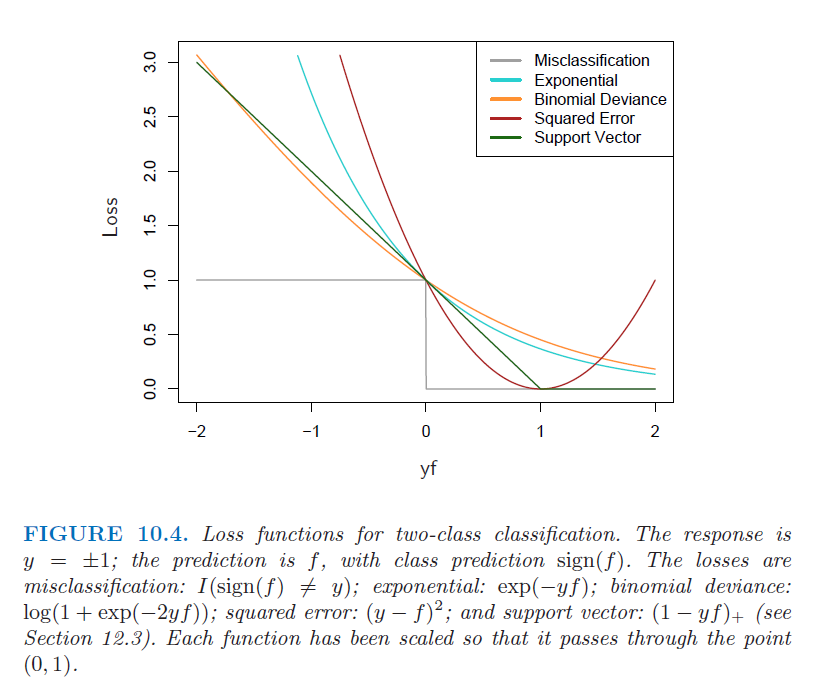

### Q5. 

**Why using a one-hot encoding? Wouldn’t be simpler to use a single output? Hint: The answer has to do with the interplay between the loss and the sigmoidal activation functions.**

In classification problems, involving categorical variables. It is beneficial to use One- hot Encoding if there is no natural relationship between the categories. 

If these categorical variables are instead treated with ordinal Encoding, then we are giving a wrong sense of notion to our model. This means if we define a Quadratic loss function (again this results in non-convex optimization) then the loss of misclassification of one class w.r.t another is not same anymore. That means we are inducing inherent biases into our data analysis. 

With Ordinal Encoding, we cannot use Sigmoid or Softmax activation function which implies that we cannot evaluate Cross-Entropy loss (a more robust loss function)

To avoid this, we can use one-hot encoding, after which we can define Cross-Entropy loss (which has symmetrical misclassification loss about any classes).

### Q6. 

**Test the sensibility of the gradient descent method with respect to the learning rate.**

The learning rates $0.1$ and $0.14$ are found to be optimal with faster convergence as well as smooth curves with less variability. Learning rate $0.14$ behaves slightly better than $0.1$. Other combinations like $0.2$ has faster convergence but erratic curve and $0.04$ is converging too slowly. 


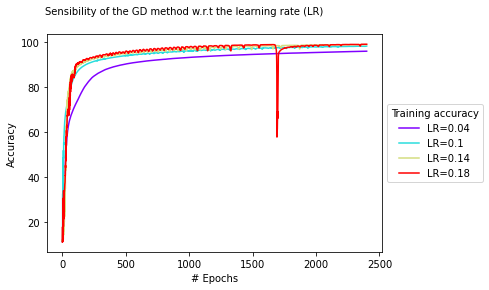

### Q7. 

**With the network architecture that is described in Q3. of Exercise 1 (line 32–33 of the code) do you experience any problem related to the vanishing of the gradient? Why?**

In [14]:
# CPU TO GPU

x = x.to(dev)
y = y.to(dev)
x_test = x_test.to(dev)
y_test = y_test.to(dev)
net = net.to(dev)

for k in range(200):
    optimizer.zero_grad()

    inputs = torch.flatten(x, start_dim=1, end_dim=2).to(dev)
    outputs = net(inputs)
    labels = y_one_hot.to(dev)

    #Define the empirical risk
    Risk = loss(outputs, labels)

    #Make the backward step (1 line instruction)
    Risk.backward()

    #Upadte the parameters (1 line instruction)
    optimizer.step()

    with torch.no_grad():
        print("k=", k, "   Risk = ", Risk.item())

k= 0    Risk =  0.2926501929759979
k= 1    Risk =  0.2927183508872986
k= 2    Risk =  0.29261791706085205
k= 3    Risk =  0.29291239380836487
k= 4    Risk =  0.29318758845329285
k= 5    Risk =  0.2921077013015747
k= 6    Risk =  0.29083219170570374
k= 7    Risk =  0.28884947299957275
k= 8    Risk =  0.28688308596611023
k= 9    Risk =  0.2842438519001007
k= 10    Risk =  0.28164106607437134
k= 11    Risk =  0.27926185727119446
k= 12    Risk =  0.27746737003326416
k= 13    Risk =  0.2760606110095978
k= 14    Risk =  0.2752714157104492
k= 15    Risk =  0.27495288848876953
k= 16    Risk =  0.2743118405342102
k= 17    Risk =  0.2744567096233368
k= 18    Risk =  0.2742465138435364
k= 19    Risk =  0.2744676470756531
k= 20    Risk =  0.2738681733608246
k= 21    Risk =  0.27383166551589966
k= 22    Risk =  0.27232125401496887
k= 23    Risk =  0.2711130976676941
k= 24    Risk =  0.26918521523475647
k= 25    Risk =  0.2672545313835144
k= 26    Risk =  0.26431146264076233
k= 27    Risk =  0.26180

No, as you can see from the two hundered epoch of the validation curves from Ex$2$: $Q3$ we did not experience any Vanishing gradient because the training risk keeps on decreasing. This is because there is only one hidden layer and the distance between input and output layer is very small. So the gradients calculated during back propagation are not subjected to any residual factors that might result in Vanishing Gradient.

In [10]:
# Now we define the optimizer and the loss function
loss = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1)